In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modules to process data:
from re import sub
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,RobustScaler

from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_head = train_data.head()
train_description = train_data.describe(include='all')
data_in=pd.read_csv('train.csv')

(train_head, train_description)
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [128]:
from sklearn.preprocessing import LabelEncoder
# Define categorical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class','satisfaction']

label_encoder = LabelEncoder()
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

In [130]:
# Checking for missing values in both the train and test datasets
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

(missing_values_train, missing_values_test)

(Unnamed: 0                             0
 id                                     0
 Gender                                 0
 Customer Type                          0
 Age                                    0
 Type of Travel                         0
 Class                                  0
 Flight Distance                        0
 Inflight wifi service                  0
 Departure/Arrival time convenient      0
 Ease of Online booking                 0
 Gate location                          0
 Food and drink                         0
 Online boarding                        0
 Seat comfort                           0
 Inflight entertainment                 0
 On-board service                       0
 Leg room service                       0
 Baggage handling                       0
 Checkin service                        0
 Inflight service                       0
 Cleanliness                            0
 Departure Delay in Minutes             0
 Arrival Delay in Minutes         

In [131]:
train_data['Arrival Delay in Minutes'].mean()

15.178678301832152

<Axes: xlabel='Arrival Delay in Minutes'>

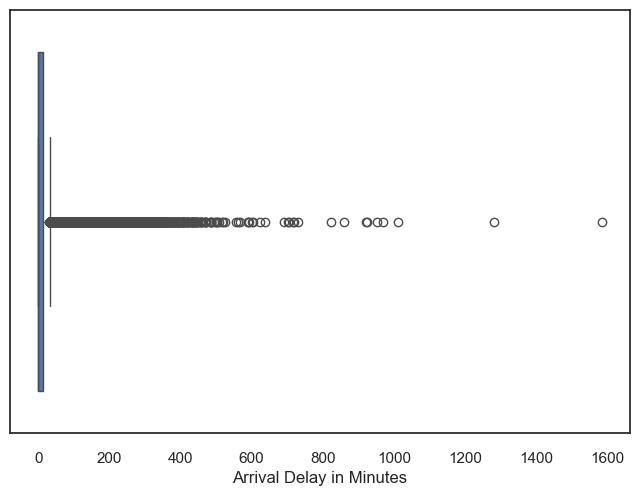

In [132]:
import seaborn as sns
sns.boxplot(x='Arrival Delay in Minutes',data = train_data)

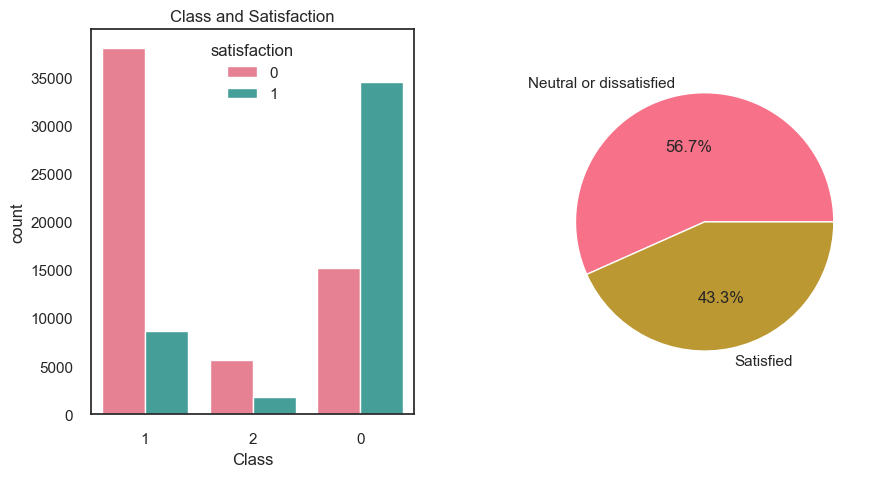

In [133]:
sns.set_style("white")
fig,ax = plt.subplots(1,2,figsize = (10,5))

plt.subplots_adjust(hspace = 0.6, wspace=0.4)

sns.countplot(x='Class',data = train_data, hue = 'satisfaction', order=['1', '2','0'], palette='husl', ax = ax[0])
ax[0].set_title('Class and Satisfaction')

ax[1]=plt.pie(train_data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("husl"), autopct = '%1.1f%%')
pass

In [134]:
train_data['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

In [136]:
# Impute missing values with the median of the respective columns in both datasets
median_arrival_delay_train = train_data['Arrival Delay in Minutes'].median()
median_arrival_delay_test = test_data['Arrival Delay in Minutes'].median()

train_data['Arrival Delay in Minutes'].fillna(median_arrival_delay_train, inplace=True)
test_data['Arrival Delay in Minutes'].fillna(median_arrival_delay_test, inplace=True)

# Re-check for missing values to confirm imputation
missing_values_train_after = train_data['Arrival Delay in Minutes'].isnull().sum()
missing_values_test_after = test_data['Arrival Delay in Minutes'].isnull().sum()

(missing_values_train_after, missing_values_test_after)

(0, 0)

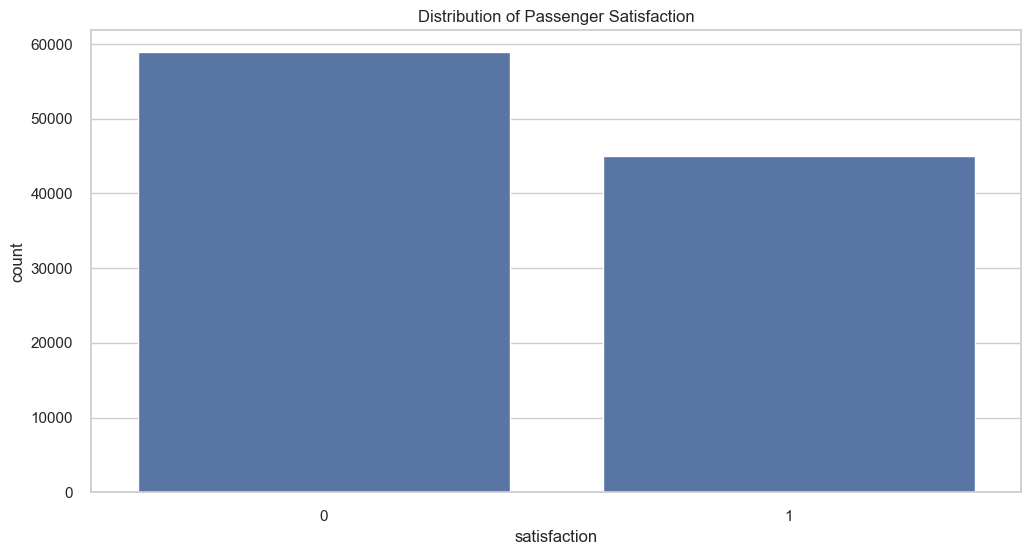

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualizations
sns.set(style="whitegrid")

# Exploring the distribution of passenger satisfaction
plt.figure(figsize=(12, 6))
satisfaction_count = sns.countplot(x='satisfaction', data=train_data)
satisfaction_count.set_title('Distribution of Passenger Satisfaction')
plt.show()

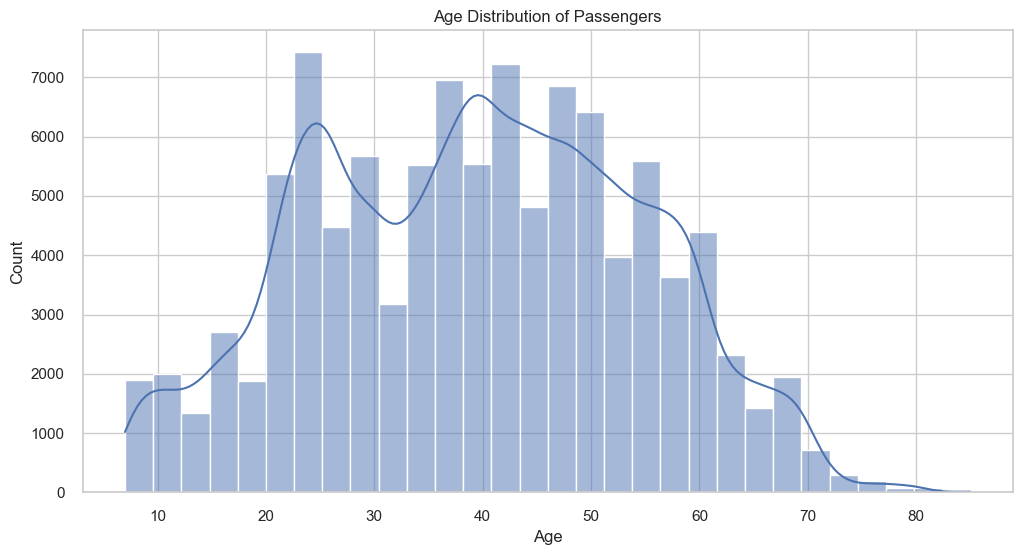

In [138]:
# Exploring Age distribution
plt.figure(figsize=(12, 6))
age_distribution = sns.histplot(train_data['Age'], bins=30, kde=True)
age_distribution.set_title('Age Distribution of Passengers')
plt.show()

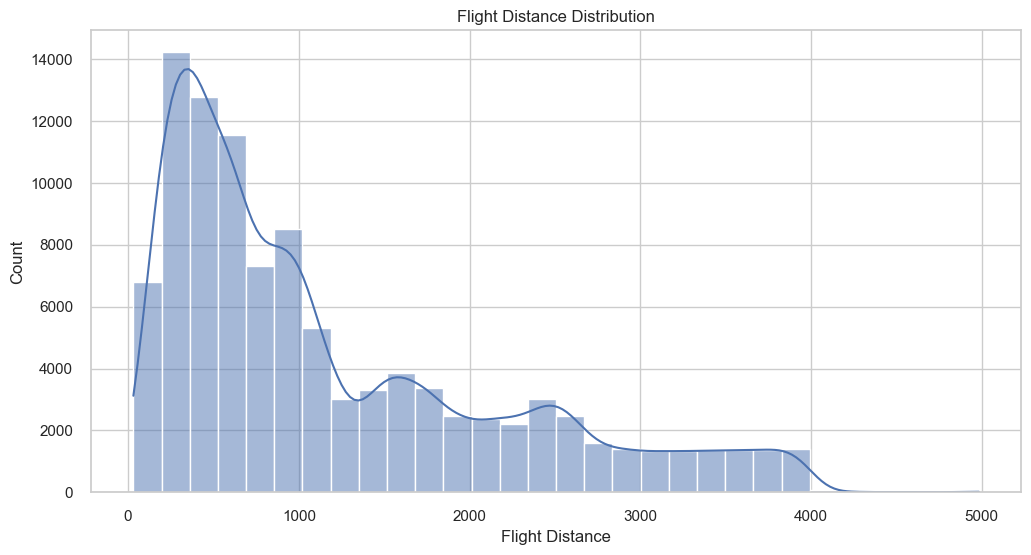

In [139]:
# Exploring Flight Distance distribution
plt.figure(figsize=(12, 6))
distance_distribution = sns.histplot(train_data['Flight Distance'], bins=30, kde=True)
distance_distribution.set_title('Flight Distance Distribution')
plt.show()

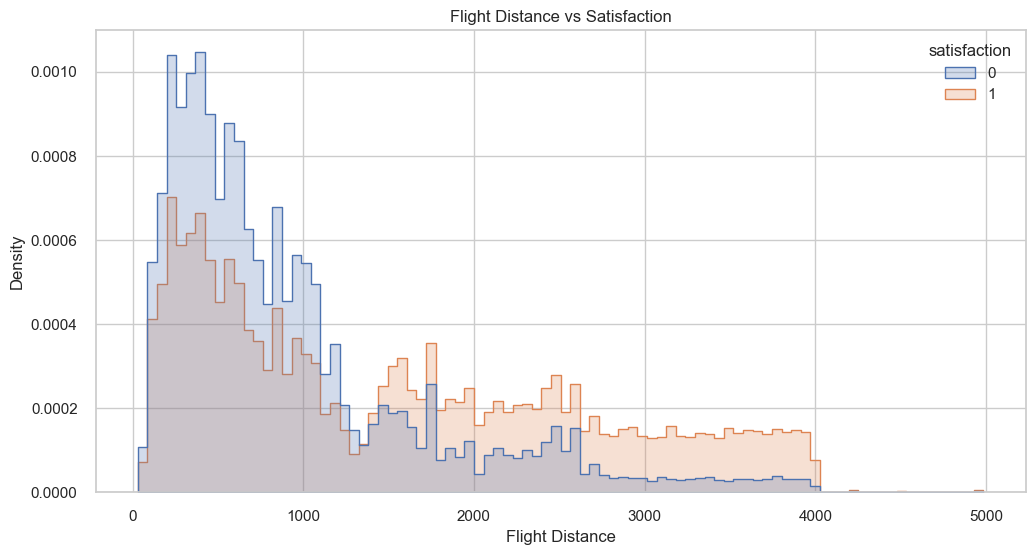

In [140]:
# Segmenting data based on flight distance to see how it correlates with satisfaction
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Flight Distance', hue='satisfaction', element='step', stat='density', common_norm=False)
plt.title('Flight Distance vs Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Density')
plt.show()

[Text(0.5, 1.0, 'Distribution of Flight Distance by Class')]

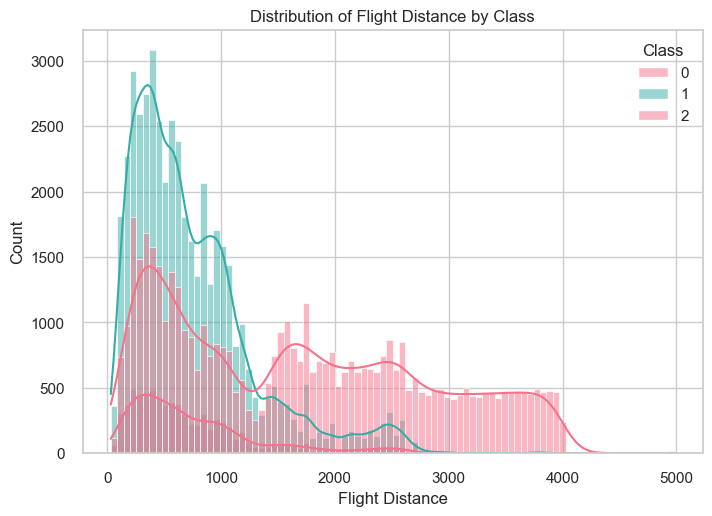

In [141]:
sns.histplot(x='Flight Distance',data=train_data,hue='Class',kde=True,palette='husl').set(title='Distribution of Flight Distance by Class')

<Axes: title={'center': 'Satisfaction based on Delay'}, xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

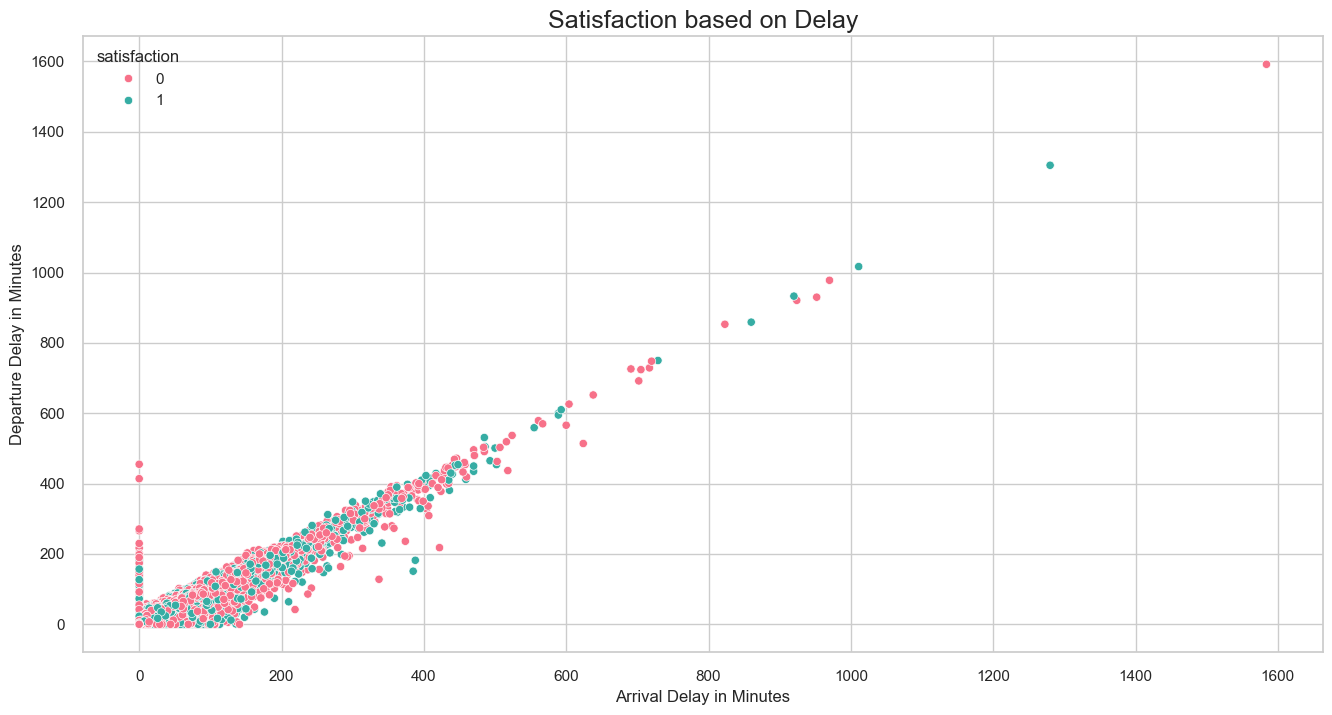

In [142]:
plt.figure(figsize=(16,8))

plt.title('Satisfaction based on Delay',size=18)

sns.scatterplot(y='Departure Delay in Minutes',data=train_data,x='Arrival Delay in Minutes',hue='satisfaction',palette='husl',)

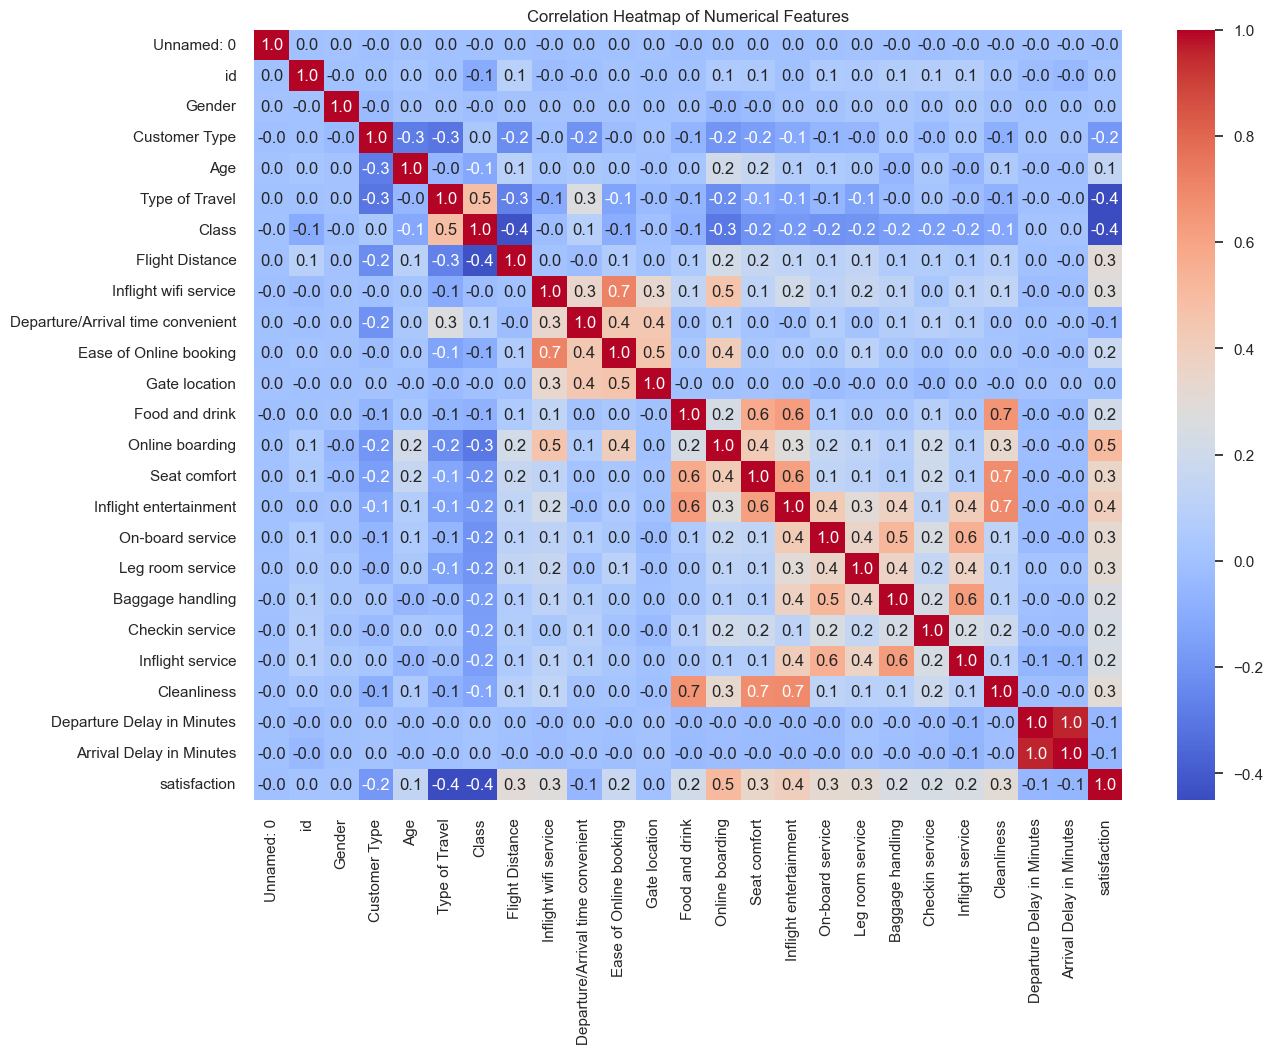

In [143]:
plt.figure(figsize=(14, 10))
correlation_matrix = train_data.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
heatmap.set_title('Correlation Heatmap of Numerical Features')
plt.show()

In [144]:
data_in.drop(columns=["Unnamed: 0"], inplace=True)

In [145]:
data_in.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [146]:
data_in["Arrival Delay in Minutes"].fillna(0,inplace=True)

In [147]:
varnames=data_in.columns.to_list()
varnames2=[]

for i in varnames:
    temp=sub("\s","_",i)
    varnames2.append(temp)
    
data_in.columns=varnames2

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sinha\AppData\Local\Temp\ipykernel_46316\1401584196.py:5: SyntaxWarning: invalid escape sequence '\s'
  temp=sub("\s","_",i)


In [148]:
# extract categorical variables into "cat_vars" dataframe:
cat_vars=data_in.select_dtypes(include="object")
cat_vars_names=cat_vars.columns

In [149]:
for i in cat_vars_names:
    temp=str(pd.unique(cat_vars[i]))
    print(f"{i:<15}{temp:<30}")

Gender         ['Male' 'Female']             
Customer_Type  ['Loyal Customer' 'disloyal Customer']
Type_of_Travel ['Personal Travel' 'Business travel']
Class          ['Eco Plus' 'Business' 'Eco'] 
satisfaction   ['neutral or dissatisfied' 'satisfied']


In [150]:
class_lvls=["Eco","Eco Plus","Business"]
enc=OrdinalEncoder(categories=[class_lvls])

In [151]:
cat_vars["Class"]=enc.fit_transform(cat_vars[["Class"]]) 
cat_vars["Class"]=pd.to_numeric(cat_vars["Class"],downcast="integer")
cat_vars["Class"].head()

0    1
1    2
2    2
3    2
4    2
Name: Class, dtype: int8

In [152]:
rate_cols=['Inflight_wifi_service',
           'Departure/Arrival_time_convenient',
           'Ease_of_Online_booking',
           'Gate_location',
           'Food_and_drink',
           'Online_boarding',
           'Seat_comfort',
           'Inflight_entertainment',
           'On-board_service',
           'Leg_room_service',
           'Baggage_handling',
           'Checkin_service',
           'Inflight_service',
           'Cleanliness'
          ]
rate_vars=data_in[rate_cols]
rate_vars.head()


,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [153]:
# exclude the "Class" ordinal variable from the list of categorical variables:
lab_enc_vars=cat_vars_names.drop("Class")

# label-encode the rest of the vaiables:
for i in lab_enc_vars:
    cat_vars[i]=LabelEncoder().fit_transform(cat_vars[i])
    
cat_vars.head()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
0,1,0,1,1,0
1,1,1,0,2,0
2,0,0,0,2,1
3,0,0,0,2,0
4,1,0,0,2,1


In [154]:
num_vars=data_in[["Age", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]]
num_scaled=RobustScaler().fit_transform(num_vars)

num_scaled=pd.DataFrame(num_scaled,columns=num_vars.columns)
num_scaled.head()

num_scaled.head()

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,-1.125000,-0.288187,2.083333,1.384615
1,-0.625000,-0.457487,0.083333,0.461538
2,-0.583333,0.224981,0.000000,0.000000
3,-0.625000,-0.211437,0.916667,0.692308
4,0.875000,-0.473288,0.000000,0.000000


In [155]:
outlrs_df=pd.concat([cat_vars,rate_vars,num_scaled],axis=1)
outlrs_df.head()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,1,1,0,3,4,3,1,5,...,4,3,4,4,5,5,-1.125000,-0.288187,2.083333,1.384615
1,1,1,0,2,0,3,2,3,3,1,...,1,5,3,1,4,1,-0.625000,-0.457487,0.083333,0.461538
2,0,0,0,2,1,2,2,2,2,5,...,4,3,4,4,4,5,-0.583333,0.224981,0.000000,0.000000
3,0,0,0,2,0,2,5,5,5,2,...,2,5,3,1,4,2,-0.625000,-0.211437,0.916667,0.692308
4,1,0,0,2,1,3,3,3,3,4,...,3,4,4,3,3,3,0.875000,-0.473288,0.000000,0.000000


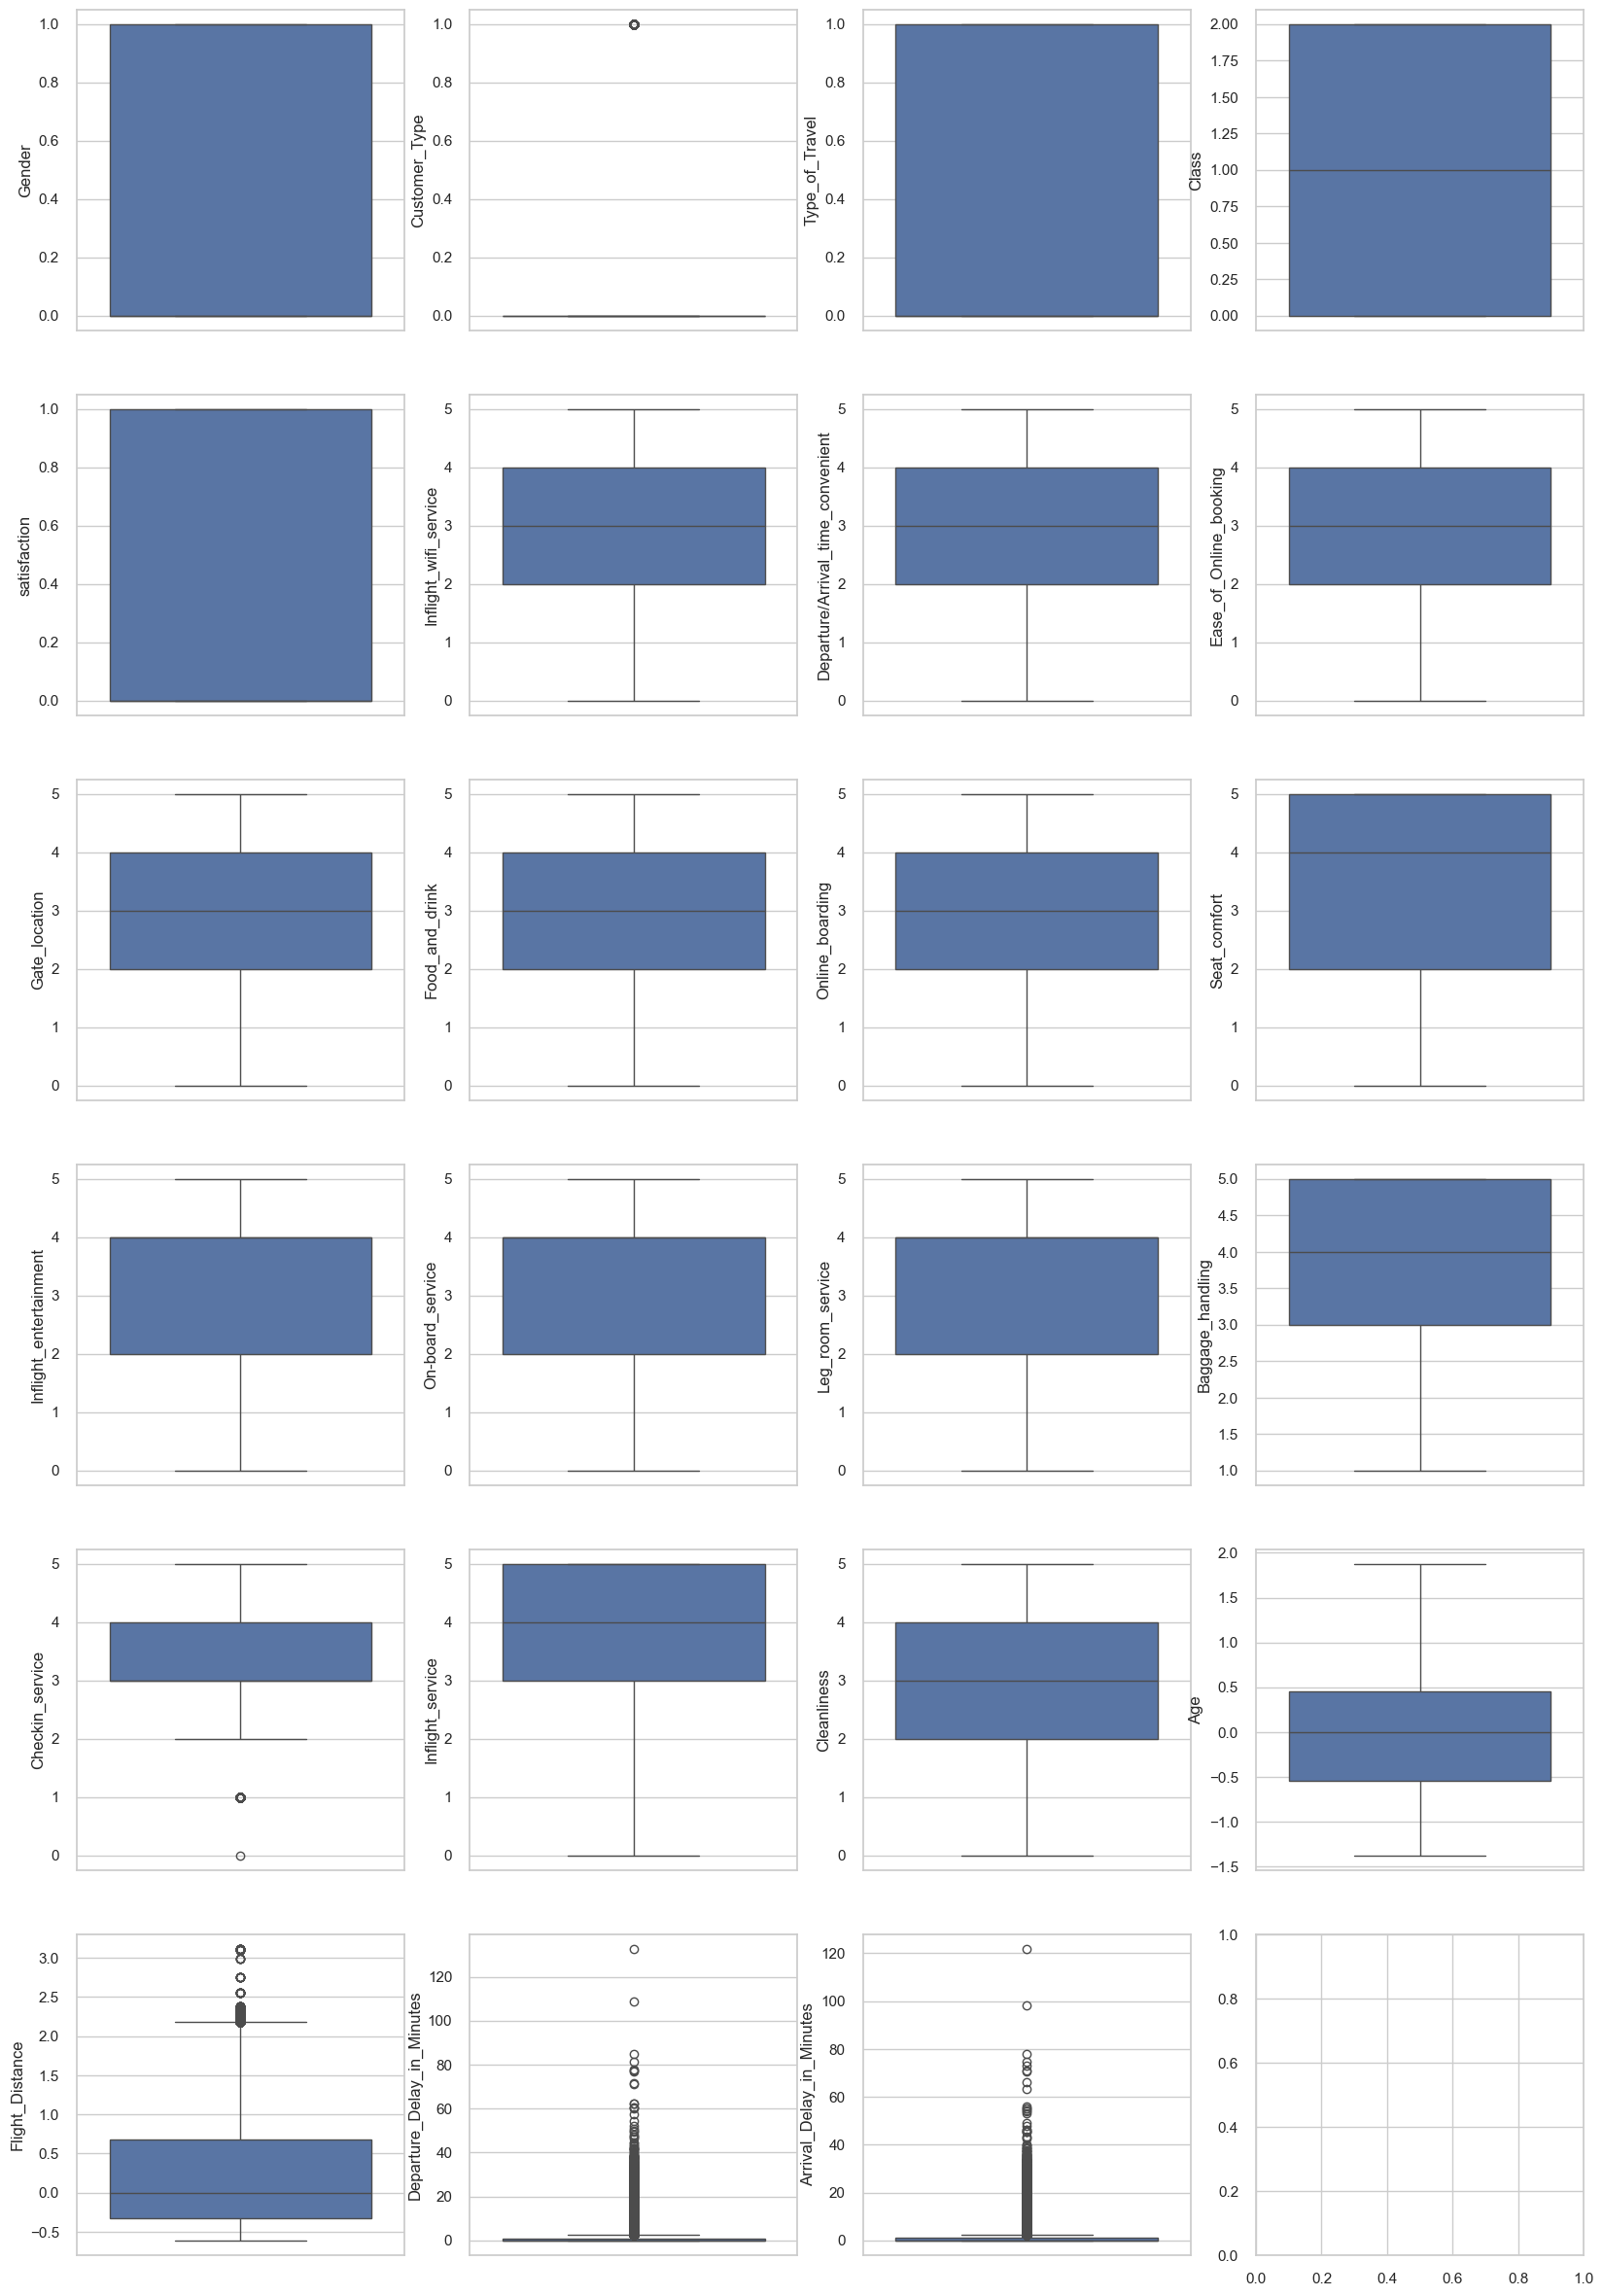

In [156]:
# Lay the ground for a "6x4 (to cover 23 variables) boxplot mosaic":
box_locs=pd.DataFrame(
{"vert":sorted(list(range(0,6))*4),
 "horiz":list(range(0,4))*6}
)

fig,axs=plt.subplots(ncols=4,nrows=6,figsize=(20,30))

for idx,i in enumerate(outlrs_df.columns):
    sns.boxplot(y=outlrs_df[i],ax=axs[box_locs.iloc[idx,0]][box_locs.iloc[idx,1]])

In [157]:
a=outlrs_df["Arrival_Delay_in_Minutes"]>100
a.value_counts()

Arrival_Delay_in_Minutes
False    103903
True          1
Name: count, dtype: int64

In [158]:
data_in["id"][outlrs_df["Checkin_service"]<1]

6580    21093
Name: id, dtype: int64

In [159]:
# Take indices of all the outliers:
outs_idx=[outlrs_df.Flight_Distance[outlrs_df.Flight_Distance>2.5].index.astype('int'),
          outlrs_df.Checkin_service[outlrs_df.Checkin_service<-2].index.astype('int'),
          outlrs_df.Departure_Delay_in_Minutes[outlrs_df.Departure_Delay_in_Minutes>100].index.astype('int')]

outs_idx=pd.Series(sorted(np.concatenate(outs_idx))).unique()

outlrs_df.drop(index=outs_idx,inplace=True)
outlrs_df.reset_index(drop=True,inplace=True)
data_in.drop(index=outs_idx,inplace=True)
data_in.reset_index(drop=True,inplace=True)

In [160]:
# create a 'reducer' which provides 95% input variance to be explained:
pca=PCA(n_components=0.95).fit(outlrs_df)

In [161]:
# Let's find out, how many column the "reducer" has preserved out of initial 23: 
pca.n_components_

pca_df=pca.transform(outlrs_df)
pca_df=pd.DataFrame(pca_df)

pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.643481,-2.838255,1.528182,0.416362,1.525427,0.455497,1.696304,-0.958217,-0.635927,-0.612674,0.803281,1.032057,0.032499,-0.871432,-0.541133
1,-1.139223,4.151076,-1.740010,-1.240153,-2.275673,-2.218773,-1.359591,-0.771596,-0.129489,-1.628197,-0.369051,-0.299546,-0.711898,-0.546583,0.196503
2,-1.823286,-2.830938,2.882431,1.003769,-0.619484,0.646969,0.459538,0.622320,-0.066356,-0.250733,0.190945,-0.480558,-0.242091,0.121364,-0.345470
3,-0.429559,1.984216,-3.671168,-0.678198,0.751446,-1.945542,-2.566615,0.207154,-0.608445,-1.069061,0.279280,0.010339,-0.537323,-0.715604,-1.414846
4,-1.730046,-1.267699,-0.075760,0.944302,-1.408517,0.170834,-0.730823,0.082743,-0.701223,-0.326915,-0.593180,-0.996033,1.287336,-0.032703,-0.018871


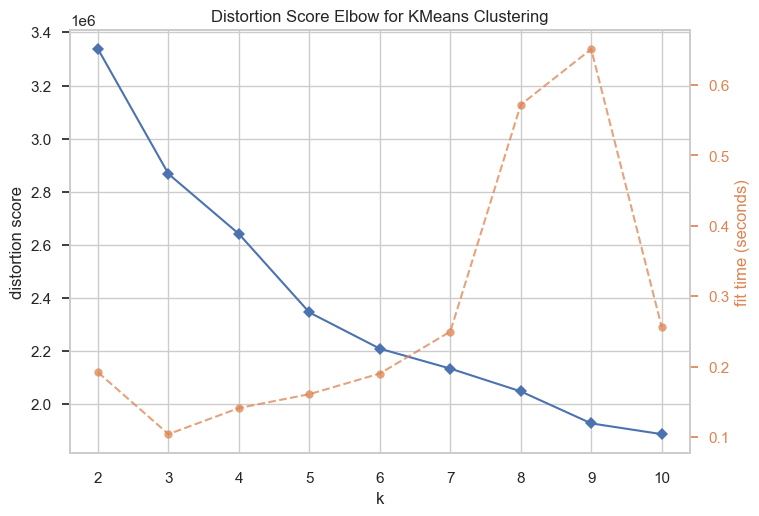

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [162]:
# create empty visualizer and fit the data:
elbow=KElbowVisualizer(KMeans(n_init='auto',random_state=1), k=10,locate_elbow=False)
elbow.fit(pca_df)

# depict the graph:
elbow.show()

In [163]:
kmeans = KMeans(n_clusters=5,n_init='auto',random_state=1)

In [164]:
Cluster=kmeans.fit_predict(pca_df) # fit the data
Cluster

array([0, 3, 0, ..., 0, 3, 3])

In [165]:
# Let's attach 'Cluster' as a new variable to 'data_in':
data_in['Cluster']=Cluster

# From now on, we are going to work with "data_in" only!
data_in.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Cluster
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,3
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,3
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


<Axes: xlabel='Cluster', ylabel='count'>

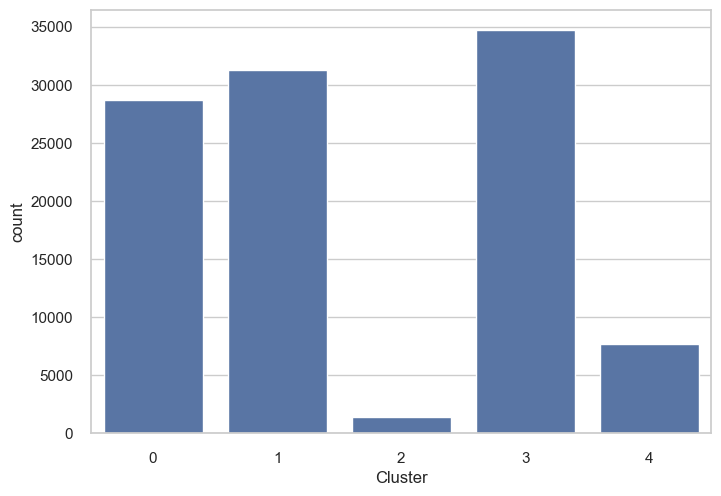

In [166]:
sns.countplot(x="Cluster",data=data_in)

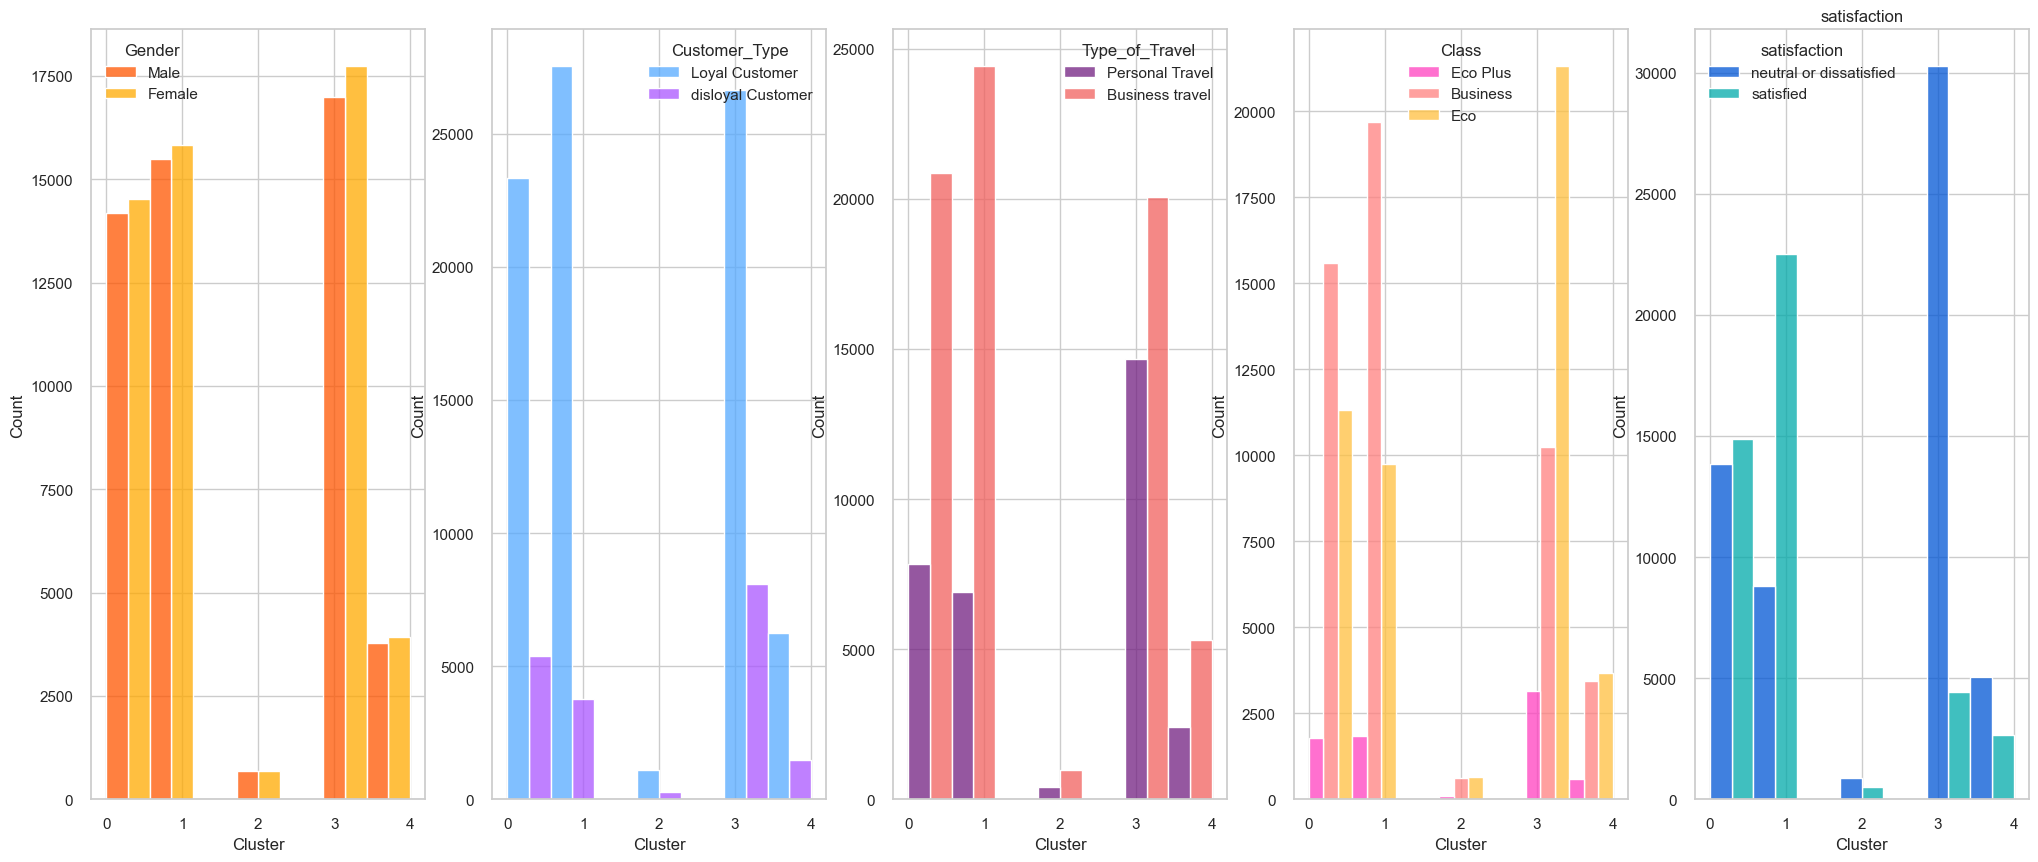

In [167]:
pal=['autumn','cool','magma','spring','winter'] # 5 color palettes for 5 categorical vars
    
fig,axs=plt.subplots(ncols=5,figsize =(25, 10))

for idx,i in enumerate(cat_vars.columns):
    plt.title(i)
    sns.histplot(data=data_in,x='Cluster',hue=i,palette=pal[idx],binwidth=.6,ax=axs[idx],multiple='dodge')

In [168]:
temp=data_in.groupby('Cluster')['satisfaction'].apply('value_counts')

temp=temp.unstack()

print(temp.satisfied/(temp.satisfied+temp['neutral or dissatisfied'])*100)

Cluster
0    51.756921
1    71.902542
2    36.456064
3    12.820734
4    34.483206
dtype: float64


In [169]:
temp=data_in[['Cluster','Age']]
temp.head()

,Cluster,Age
0,0,13
1,3,25
2,0,26
3,3,25
4,1,61


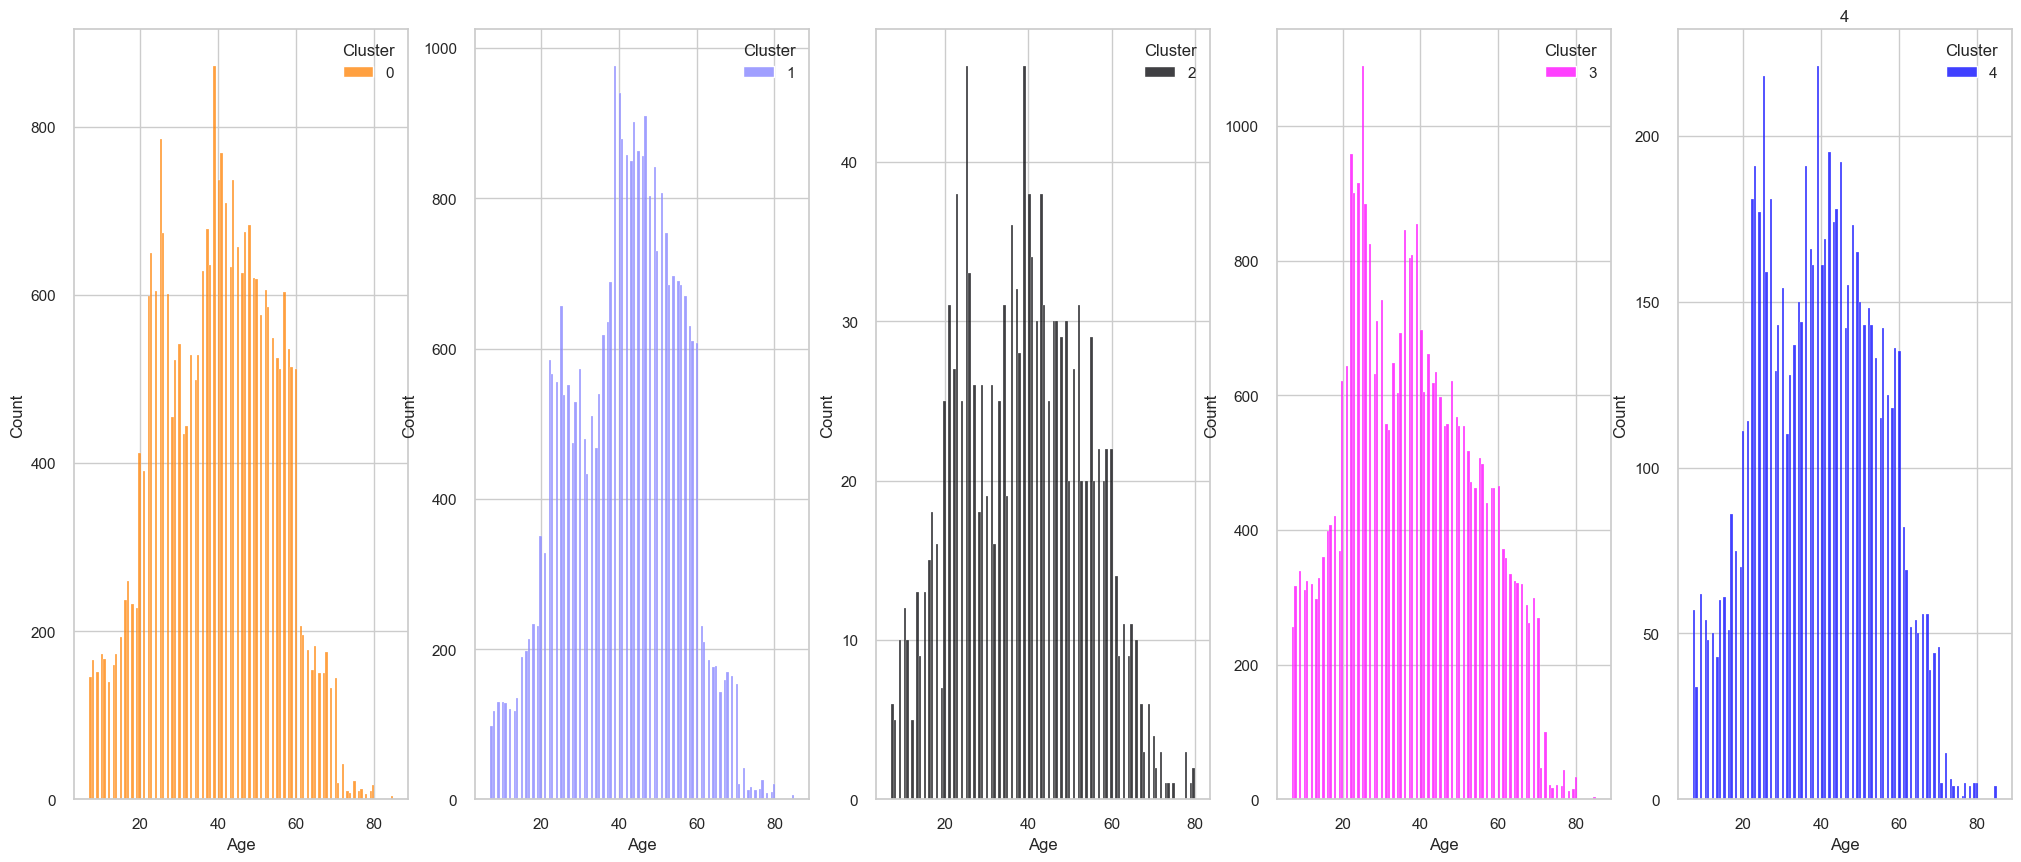

In [170]:
fig,axs=plt.subplots(ncols=5,figsize =(25, 10))

for i in list(range(0,5)):
    plt.title(i)
    sns.histplot(data=temp[temp.Cluster==i],x='Age',hue='Cluster',palette=pal[i],binwidth=.6,ax=axs[i],multiple='dodge')

In [171]:
data_in["Average_point"]=round(data_in[rate_cols].mean(axis=1),3)

data_in["Average_point"].head(10)

0    3.857
1    2.286
2    3.714
3    3.000
4    3.500
5    2.500
6    2.786
7    4.500
8    2.071
9    2.929
Name: Average_point, dtype: float64

In [172]:
round(data_in.groupby("Cluster")["Average_point"].apply("mean"),1)

Cluster
0    3.3
1    3.9
2    3.2
3    2.6
4    3.2
Name: Average_point, dtype: float64

In [173]:
data_in[data_in.Cluster==1]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Cluster,Average_point
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,1,3.500
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,4,5,4,4,0.0,satisfied,1,4.500
10,34991,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,5,...,3,5,3,5,2,0,0.0,neutral or dissatisfied,1,3.571
13,83502,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,...,5,2,2,2,4,0,0.0,satisfied,1,3.429
17,127461,Male,Loyal Customer,41,Business travel,Business,2075,4,4,2,...,5,5,3,5,5,0,10.0,satisfied,1,4.214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103831,83013,Male,Loyal Customer,54,Business travel,Business,1991,5,5,5,...,5,4,5,4,4,35,31.0,satisfied,1,4.429
103834,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,4,...,4,4,3,4,5,17,26.0,satisfied,1,4.214
103836,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,...,4,3,1,3,4,0,0.0,neutral or dissatisfied,1,3.786
103837,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,...,4,4,4,4,4,9,7.0,satisfied,1,4.429


In [174]:
data_in['Total_delay']=round(data_in[["Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"]].sum(axis=1),3)

data_in[["Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes","Total_delay"]].head()

,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Total_delay
0,25,18.0,43.0
1,1,6.0,7.0
2,0,0.0,0.0
3,11,9.0,20.0
4,0,0.0,0.0


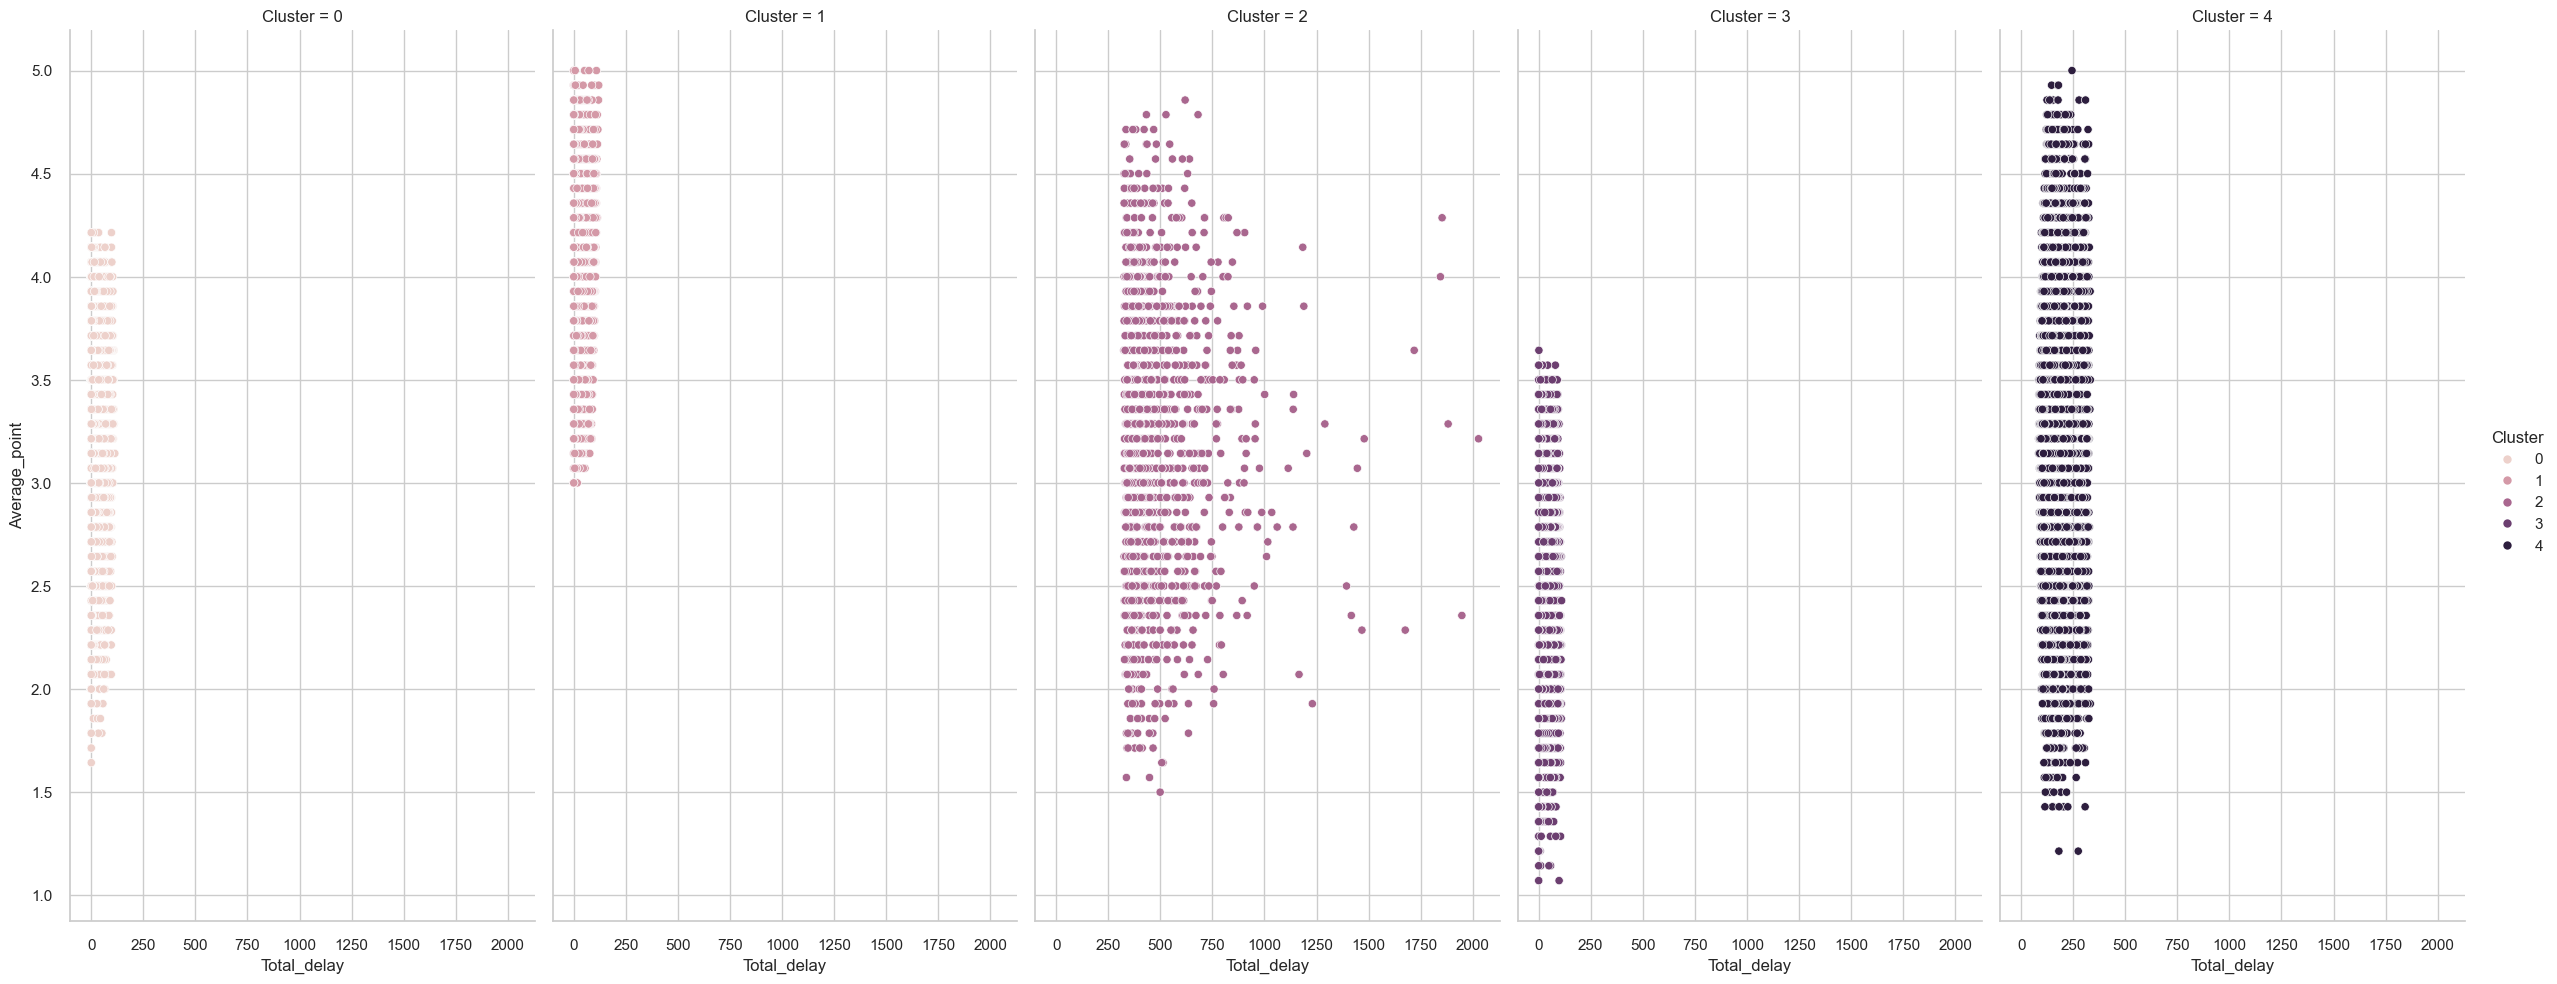

In [175]:
sns.relplot(data=data_in,x='Total_delay',y='Average_point',col='Cluster',hue='Cluster',height=10,aspect=.5)

<Axes: xlabel='Cluster', ylabel='Flight_Distance'>

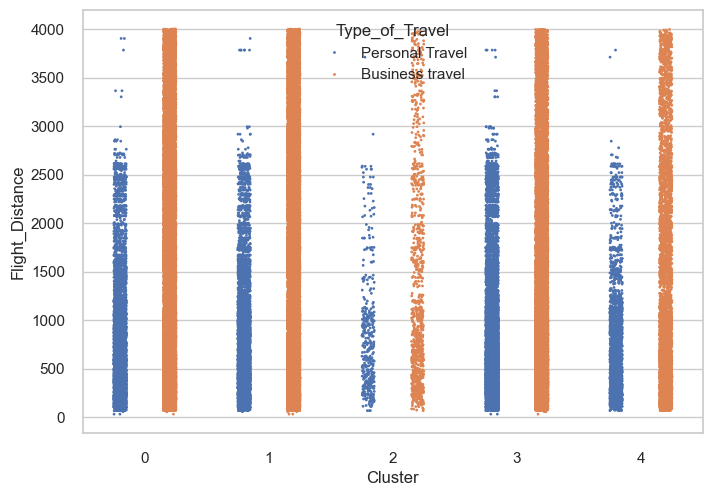

In [176]:
sns.stripplot(x=data_in.Cluster,y=data_in.Flight_Distance,hue=data_in.Type_of_Travel,dodge=True,size=2)

In [177]:
from sklearn.model_selection import train_test_split

for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Selecting features based on previous analysis
selected_features = [
    'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 
    'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

# Setting up the target variable
target = 'satisfaction'

# Splitting the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_data[selected_features], train_data[target], test_size=0.2, random_state=42
)

# Confirming the setup
(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

((83123, 20), (20781, 20), (83123,), (20781,))

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

(accuracy, classification_rep)

(0.9635243732255425,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97     11713\n           1       0.98      0.94      0.96      9068\n\n    accuracy                           0.96     20781\n   macro avg       0.97      0.96      0.96     20781\nweighted avg       0.96      0.96      0.96     20781\n')

Model Building
Random Forest Classifier because it handles both numerical and categorical data well and is robust against overfitting.


Accuracy: 96.35%
Precision, Recall, and F1-Score:
Class 0 (Neutral or Dissatisfied): Precision = 95%, Recall = 98%, F1-score = 97%
Class 1 (Satisfied): Precision = 98%, Recall = 94%, F1-score96% = 

The metrics indicate that the model performs excellently in predicting passenger satisfaction, with high scores in both precision and recall across the satisfaction categori96%

In [25]:
# Extracting feature importance from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame to view features and their importance scores
features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
11,Online boarding,0.171534
6,Inflight wifi service,0.151017
4,Class,0.099753
3,Type of Travel,0.097657
13,Inflight entertainment,0.057292
12,Seat comfort,0.045061
5,Flight Distance,0.043389
15,Leg room service,0.039845
8,Ease of Online booking,0.037885
1,Customer Type,0.035961


In [26]:
# Preparing the test data set with the selected features
X_test = test_data[selected_features]
y_test = test_data[target]

# Predicting on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

(test_accuracy, test_classification_report)

(0.9628888204496459,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97     14573\n           1       0.97      0.94      0.96     11403\n\n    accuracy                           0.96     25976\n   macro avg       0.96      0.96      0.96     25976\nweighted avg       0.96      0.96      0.96     25976\n')

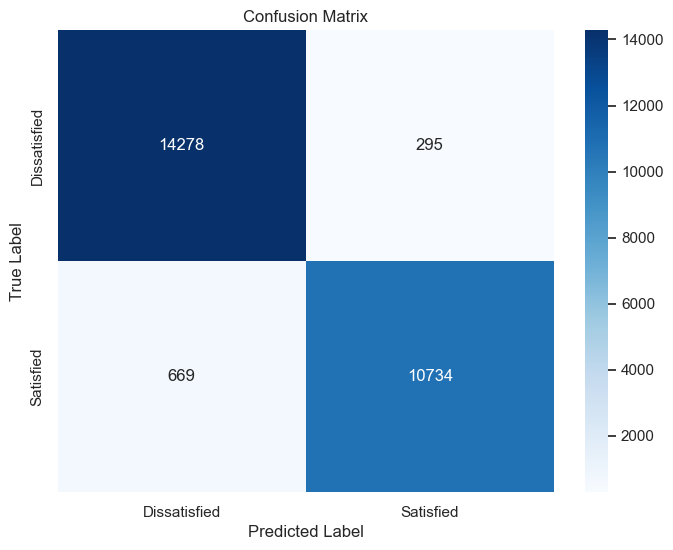

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Creating a confusion matrix for the test data predictions
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()